Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
First Few Rows of Dataset:
   Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0         1         Clothing         3262.0          58.0     3.0   
1         2         Clothing          214.0          20.0     3.0   
2         3       Home Decor         3429.0          51.0     2.0   
3         4            Books         4568.0          35.0     3.0   
4         5 

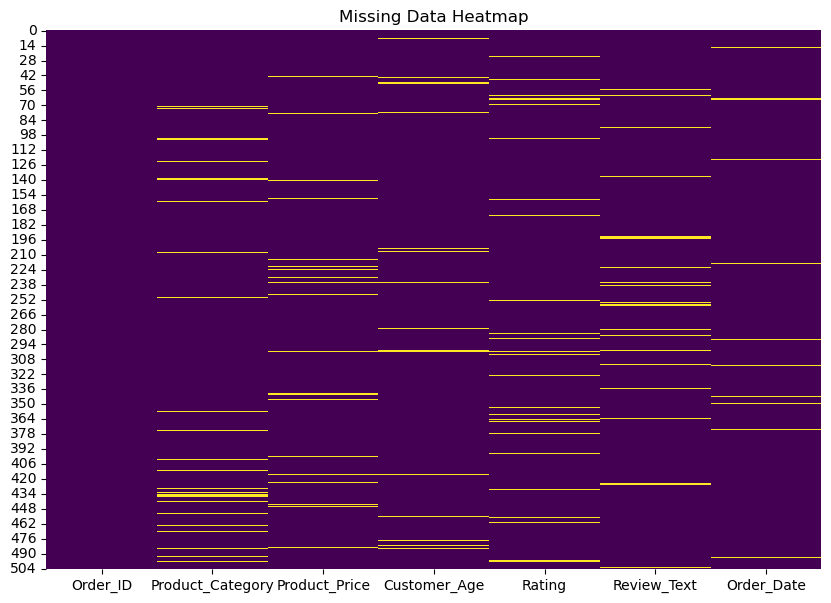

KeyError: "['Quantity'] not in index"

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

# Step 2: Load the dataset
df = pd.read_csv('Day 19_E-Commerce_Data.csv')  # Replace with your actual dataset path

# Step 3: Initial exploration of the dataset
print("Dataset Information:")
print(df.info())  # Display info about the dataset (columns, non-null count, data types)

print("First Few Rows of Dataset:")
print(df.head())  # View the first few rows to get an idea of the data structure

# Step 4: Identify Missing Data
# Check missing data count and percentage
missing_data = df.isna().sum()
missing_percentage = df.isna().mean() * 100

print("Missing Values Count:")
print(missing_data)

print("Percentage of Missing Values:")
print(missing_percentage)

# Step 5: Analyze Missing Data Patterns
# Visualizing missing data pattern using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Step 6: Handle Missing Values
# 6.1: Impute Missing Numerical Columns (e.g., Product_Price)
numerical_cols = ['Product_Price', 'Quantity']  # Add numerical columns that may have missing values
num_imputer = SimpleImputer(strategy='median')  # Using median for numerical columns (works well with skewed data)
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# 6.2: Impute Missing Categorical Columns (e.g., Product_Category)
categorical_cols = ['Product_Category']  # Add categorical columns that may have missing values
cat_imputer = SimpleImputer(strategy='most_frequent')  # Mode imputation for categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# 6.3: Impute Missing Date Fields (e.g., Order_Date) using Forward Fill or Backward Fill
df['Order_Date'] = df['Order_Date'].fillna(method='ffill')  # Forward fill for date-related columns

# 6.4: K-Nearest Neighbors (KNN) Imputation (for complex cases)
# Use KNN imputation for rows where multiple columns have missing values
knn_imputer = KNNImputer(n_neighbors=5)
# Select numerical columns for KNN imputation
df_knn_imputed = df.copy()  # Create a copy for KNN imputation
df_knn_imputed[df_knn_imputed.select_dtypes(include=['float64', 'int64']).columns] = knn_imputer.fit_transform(df_knn_imputed.select_dtypes(include=['float64', 'int64']))

# Step 7: Evaluate the Impact of Imputation
# Compare summary statistics before and after imputation

print("Summary Statistics Before Imputation:")
print(df.describe())

print("Summary Statistics After Imputation (KNN):")
print(df_knn_imputed.describe())

# Step 8: Visualizing the Impact of Imputation

# Compare distribution of 'Product_Price' before and after imputation (for example)
plt.figure(figsize=(12, 6))

# Original Product_Price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Product_Price'], kde=True, color='blue', label='Original', stat='density')
plt.title("Product Price Distribution Before Imputation")

# KNN Imputed Product_Price distribution
plt.subplot(1, 2, 2)
sns.histplot(df_knn_imputed['Product_Price'], kde=True, color='red', label='KNN Imputed', stat='density')
plt.title("Product Price Distribution After KNN Imputation")

plt.tight_layout()
plt.show()

# Step 9: Final Data Export
# Save the cleaned dataset for further analysis
df_knn_imputed.to_csv('cleaned_ecommerce_orders.csv', index=False)

print("Cleaned dataset saved as 'cleaned_ecommerce_orders.csv'")
